In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
df = pd.read_csv('hiring.csv')
df

,experiance,test_score,interview_score,salary(in $)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
text_to_num = {
      'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
      'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
      'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13,
}


In [5]:
df['experiance'] = df['experiance'].apply(lambda x: text_to_num.get(str(x).lower(), x))
df.to_csv('hiringUpdated.csv', index=False)
df


,experiance,test_score,interview_score,salary(in $)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


Finding the mean values for the experiance column

In [6]:
import math
mean_experience = math.floor(df['experiance'].mode()[0])
mean_experience

2

In [7]:
df.experiance = df.experiance.fillna(mean_experience)
df  

,experiance,test_score,interview_score,salary(in $)
0,2.0,8.0,9,50000
1,2.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [8]:
median_test_score = math.floor(df.test_score.median())
median_test_score

8

In [9]:
df.test_score = df.test_score.fillna(median_test_score)
df

,experiance,test_score,interview_score,salary(in $)
0,2.0,8.0,9,50000
1,2.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


So my independent Variables are 'experiance','test_score','interview_score' AND MY TARGET OUTPUT IS SALARY

In [10]:
regression = linear_model.LinearRegression()
regression.fit(df[['experiance', 'test_score','interview_score']], df['salary(in $)'])

LinearRegression()

In [11]:
regression.coef_

array([3230.12552301, 1916.31799163, 2769.87447699])

In [12]:
regression.intercept_

np.float64(9138.075313807545)

In [13]:
regression.predict([[2, 9, 6]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49464.43514644])

In [14]:
regression.predict([[12,10,10]])

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([94761.50627615])

Evaluating the model using  R², RMSE, and MAE

evaluate my model using R²

In [15]:
r2_score = regression.score(df[['experiance', 'test_score','interview_score']], df['salary(in $)'])
print(f"R² Score: {r2_score} ")

R² Score: 0.8890897096433121 


evaluate my model using RMSE

In [19]:
rmse = np.sqrt(((predictions-df['salary(in $)']) ** 2).mean())
print(f"RMSE: {rmse} ")

RMSE: 3582.996805578624 


evaluate my model using MAE

In [21]:
mae = np.abs(predictions-df['salary(in $)']).mean()
print(f"MAE: {mae} ")

MAE: 3201.8828451882828 


In [16]:
predictions = regression.predict(df[['experiance', 'test_score', 'interview_score']])


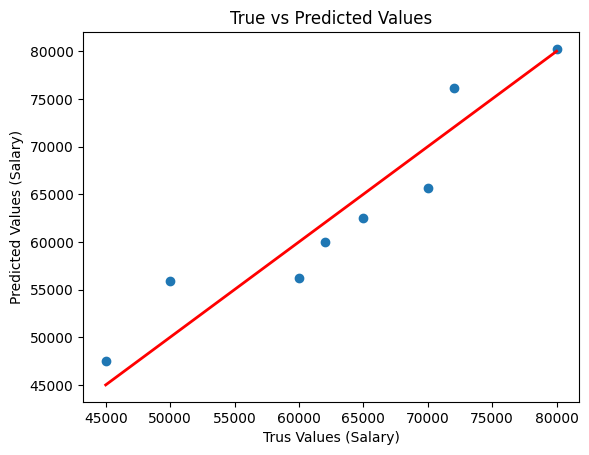

In [17]:
import matplotlib.pyplot as plt 
y_pred = regression.predict(df[['experiance', 'test_score','interview_score']])

plt.scatter(df['salary(in $)'], predictions)
plt.plot([min(df['salary(in $)']), max(df['salary(in $)'])], [min(df['salary(in $)']), max(df['salary(in $)'])], color='red', lw=2)
plt.xlabel('Trus Values (Salary)')
plt.ylabel('Predicted Values (Salary)')
plt.title('True vs Predicted Values')
plt.show()

In [26]:
# regression.fit(poly_features, df['salary(in $)'])
# predictions_poly = regression.predict(poly_features)


In [45]:
# plt.scatter(df['salary(in $)'], predictions_poly, color='blue', label='Predicted')
# plt.plot([min(df['salary(in $)']), max(df['salary(in $)'])], [min(df['salary(in $)']), max(df['salary(in $)'])], color='red', label='Perfect Fit')
# plt.xlabel('True Salary')
# plt.ylabel('Predicted Salary')
# plt.title('True vs Predicted Salary with Polynomial Features')
# plt.legend()
# plt.grid(True)
# plt.show()
